## Setup


In [110]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


There are 1 GPU(s) available.
We will use the GPU: Quadro RTX 6000
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Tue Dec  6 12:30:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX

In [111]:
!pip install transformers == 4.12.2
!pip install farasapy == 0.0.14
!pip install pyarabic == 0.6.14
!git clone https: // github.com/aub-mind/arabert
!pip install emoji == 1.6.1
!pip install sentencepiece == 0.1.96


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [112]:
pip install scikit-learn


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split


In [114]:
pip install xlrd == 1.2.0


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


## Dataset preprocessing


In [115]:
ailments_data = pd.read_excel("ailments_arabic.xlsx", header=None)

ailments_data.rename(columns={0: "phrase", 1: "prompt"}, inplace=True)
print("Missing values: ", ailments_data.isnull().sum())
ailments_data = ailments_data.drop_duplicates()

Missing values:  phrase    0
prompt    0
dtype: int64


In [116]:
ailments_data["prompt"].value_counts()

Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64

In [117]:
ailments_data["prompt"].value_counts()[0]

31

In [118]:
from statistics import mode
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

# print(mode(ailments_data['prompt']) ,' ',ailments_data['prompt'].value_counts()[0])
# symptoms=list(ailments_data['prompt'].unique())
max_count = ailments_data["prompt"].value_counts()[0]

aug_data = ailments_data

for ind in ailments_data.index:
    print(aug_data["prompt"].value_counts())
    label = aug_data["prompt"][ind]
    texts = aug_data["phrase"][ind]
    name_count = len(aug_data.loc[aug_data["prompt"] == label])
    # print(name_count,' ',max_count)
    if name_count < max_count:
        # print(label)
        aug = naw.RandomWordAug(action="swap")

        if max_count - name_count > name_count:
            augmented_text = aug.augment(texts, n=1)
        else:
            augmented_text = aug.augment(texts, n=2)

        for string in augmented_text:
            aug_data = aug_data.append(
                {"phrase": string, "prompt": label}, ignore_index=True
            )


# manual oversample

Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Allergy       23
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Allergy       25
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Allergy       27
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Allergy       29
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Allergy       31
Flu           31
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Allergy       31
Flu           31
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name:

In [119]:
print(aug_data["prompt"].value_counts())
aug_data

Diarrhea      32
Bronchitis    32
Fatigue       32
Anemia        32
Allergy       31
Stress        31
Flu           31
Name: prompt, dtype: int64


,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
216,بالغضب أشعر بسرعة,Stress
217,لدي مشاكل في حيث القلب أن القلب دقات سريعة,Stress
218,مشاكل لدي في حيث القلب أن دقات القلب سريعة,Stress
219,لدي اضطرابات في النوم مختلفة لاسباب,Stress


In [120]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas


def dataAugFun(ailments_data, N):

    aug_data = ailments_data.head(0)

    texts = ailments_data["phrase"]
    for ind in ailments_data.index:
        texts = ailments_data["phrase"][ind]
        label = ailments_data["prompt"][ind]
        aug = naw.RandomWordAug(action="swap")
        augmented_text = aug.augment(texts, n=N)

        for string in augmented_text:
            aug_data = aug_data.append(
                {"phrase": string, "prompt": label}, ignore_index=True
            )

    return aug_data

In [121]:
aug_datax2 = dataAugFun(aug_data, 2)
aug_datax2 = aug_datax2.drop_duplicates(subset=["phrase"])
aug_datax2.index = range(0, len(aug_datax2))
aug_datax2["prompt"].value_counts()

Allergy       55
Fatigue       55
Flu           53
Anemia        51
Bronchitis    50
Stress        50
Diarrhea      32
Name: prompt, dtype: int64

In [122]:
# This will hold all the downloaded and structred datasets
all_datasets = []
DATA_COLUMN = "text"
LABEL_COLUMN = "label"

In [123]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list


In [124]:
# ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)
aug_datax2.rename(columns={0: "phrase", 1: "prompt"}, inplace=True)


aug_datax2.columns = [DATA_COLUMN, LABEL_COLUMN]
print(aug_datax2[LABEL_COLUMN].value_counts())

label_list = list(aug_datax2[LABEL_COLUMN].unique())

# ailments_data[LABEL_COLUMN] = ailments_data[LABEL_COLUMN].astype('category')

# ailments_data[LABEL_COLUMN] = ailments_data[LABEL_COLUMN].cat.codes
aug_datax2


train, test = train_test_split(aug_datax2, test_size=0.2, random_state=42)


data = CustomDataset("ailments_data", train, test, label_list)
# # all_datasets.append(data_Hard)

Allergy       55
Fatigue       55
Flu           53
Anemia        51
Bronchitis    50
Stress        50
Diarrhea      32
Name: label, dtype: int64


# Modeling

In [125]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from arabert.preprocess import ArabertPreprocessor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from torch.utils.data import DataLoader, Dataset
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    BertTokenizer,
    Trainer,
    TrainingArguments,
)
from transformers.data.processors.utils import InputFeatures

In [126]:
# select a model from the huggingface modelhub https://huggingface.co/models?language=ar
model_name = "Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city"  # we are going to use the twitter AraBERT since it has emojis and dialects

# model_name = 'aubmindlab/bert-base-arabertv02-twitter' # we are going to use the twitter AraBERT since it has emojis and dialects

In [127]:
arabic_prep = ArabertPreprocessor(model_name)

data.train[DATA_COLUMN] = data.train[DATA_COLUMN].apply(
    lambda x: arabic_prep.preprocess(x)
)
data.test[DATA_COLUMN] = data.test[DATA_COLUMN].apply(
    lambda x: arabic_prep.preprocess(x)
)

In [128]:
list(data.train[DATA_COLUMN][0:10])


['لدي ألم المعدة في',
 'أبدأ أن أعطس أكون عندما زهرة بجوار',
 'لدي وخز على واحد أكثر أو من الجسم أجزاء',
 'أنا اسعل ليلا خاصة',
 'ع',
 'البلغم لدي الأصفر الأخضر أو',
 'شاحب أنا',
 'أريد أن أنام أنا ، نعسان',
 'لدي تحركات في غير طبيعية الجسم كله',
 'أنا رأسي محمومة و و يألمانني حلقي و صوتي أصبح خشنا . و لا التنفس أستضيع']

In [129]:
tok = AutoTokenizer.from_pretrained(model_name)


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Training Sentence Lengths: 


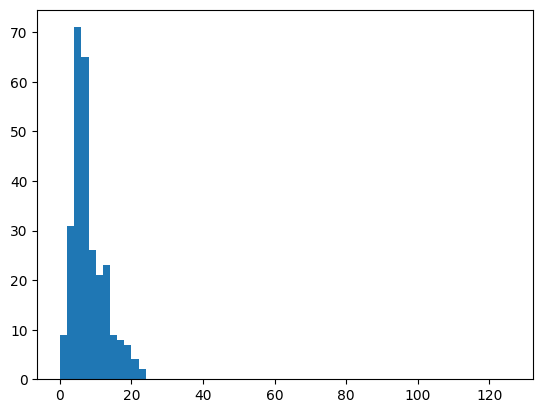

Testing Sentence Lengths: 


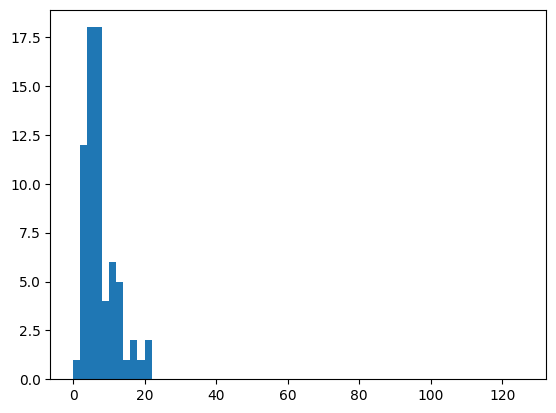

In [130]:
print("Training Sentence Lengths: ")
plt.hist(
    [len(tok.tokenize(sentence)) for sentence in data.train[DATA_COLUMN].to_list()],
    bins=range(0, 128, 2),
)
plt.show()

print("Testing Sentence Lengths: ")
plt.hist(
    [len(tok.tokenize(sentence)) for sentence in data.test[DATA_COLUMN].to_list()],
    bins=range(0, 128, 2),
)
plt.show()

In [131]:
max([len(tok.tokenize(sentence)) for sentence in data.test[DATA_COLUMN].to_list()])
max([len(tok.tokenize(sentence)) for sentence in data.train[DATA_COLUMN].to_list()])

max_len = 25

In [132]:
data_train_tok = [
    tok.tokenize(sentence) for sentence in data.train[DATA_COLUMN].to_list()
]

data_test_tok = [
    tok.tokenize(sentence) for sentence in data.test[DATA_COLUMN].to_list()
]

In [133]:
print(
    "Truncated training sequences: ",
    sum(
        [
            len(tok.tokenize(sentence)) > max_len
            for sentence in data.train[DATA_COLUMN].to_list()
        ]
    ),
)

print(
    "Truncated testing sequences: ",
    sum(
        [
            len(tok.tokenize(sentence)) > max_len
            for sentence in data.test[DATA_COLUMN].to_list()
        ]
    ),
)

Truncated training sequences:  0
Truncated testing sequences:  0


In [150]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
        super(ClassificationDataset).__init__()
        """
      Args:
      text (List[str]): List of the training text
      target (List[str]): List of the training labels
      tokenizer_name (str): The tokenizer name (same as model_name).
      max_len (int): Maximum sentence length
      label_map (Dict[str,int]): A dictionary that maps the class labels to integer
      """
        self.text = text
        self.target = target
        self.tokenizer_name = model_name
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_len = max_len
        self.label_map = label_map

    def __len__(self):
        return len(self.text)

    def __getitem__(self, item):
        text = str(self.text[item])
        text = " ".join(text.split())

        inputs = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            # return_tensors="pt"
        )
        return InputFeatures(**inputs, label=self.label_map[self.target[item]])

In [151]:
data.train[LABEL_COLUMN].to_list()


['Diarrhea',
 'Allergy',
 'Fatigue',
 'Bronchitis',
 'Diarrhea',
 'Bronchitis',
 'Anemia',
 'Fatigue',
 'Flu',
 'Bronchitis',
 'Anemia',
 'Stress',
 'Stress',
 'Fatigue',
 'Flu',
 'Anemia',
 'Allergy',
 'Allergy',
 'Fatigue',
 'Flu',
 'Fatigue',
 'Flu',
 'Stress',
 'Bronchitis',
 'Allergy',
 'Fatigue',
 'Fatigue',
 'Fatigue',
 'Allergy',
 'Allergy',
 'Bronchitis',
 'Diarrhea',
 'Allergy',
 'Flu',
 'Allergy',
 'Allergy',
 'Stress',
 'Fatigue',
 'Diarrhea',
 'Allergy',
 'Stress',
 'Fatigue',
 'Anemia',
 'Diarrhea',
 'Fatigue',
 'Allergy',
 'Allergy',
 'Stress',
 'Stress',
 'Bronchitis',
 'Allergy',
 'Allergy',
 'Bronchitis',
 'Bronchitis',
 'Anemia',
 'Stress',
 'Allergy',
 'Stress',
 'Diarrhea',
 'Bronchitis',
 'Fatigue',
 'Fatigue',
 'Fatigue',
 'Anemia',
 'Stress',
 'Flu',
 'Bronchitis',
 'Anemia',
 'Stress',
 'Bronchitis',
 'Bronchitis',
 'Bronchitis',
 'Flu',
 'Anemia',
 'Allergy',
 'Anemia',
 'Fatigue',
 'Diarrhea',
 'Anemia',
 'Fatigue',
 'Allergy',
 'Diarrhea',
 'Fatigue',
 'Bron

In [153]:
label_map = {v: index for index, v in enumerate(data.label_list)}
print(label_map)

train_dataset = ClassificationDataset(
    data.train[DATA_COLUMN].to_list(),
    data.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map,
)
test_dataset = ClassificationDataset(
    data.test[DATA_COLUMN].to_list(),
    data.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map,
)

{'Allergy': 0, 'Anemia': 1, 'Bronchitis': 2, 'Diarrhea': 3, 'Fatigue': 4, 'Flu': 5, 'Stress': 6}


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

In [154]:
print(next(iter(train_dataset)))


InputFeatures(input_ids=[2, 5081, 1951, 26369, 1947, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=3)


In [155]:
len(label_map)


7

In [156]:
def model_init():
    # return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map))
    return AutoModelForSequenceClassification.from_pretrained(
        model_name,
        return_dict=True,
        num_labels=len(label_map),
        ignore_mismatched_sizes=True,
    )

In [167]:
def compute_metrics(p):  # p should be of type EvalPrediction
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    # print(classification_report(p.label_ids,preds))
    # print(confusion_matrix(p.label_ids,preds))
    macro_f1 = f1_score(p.label_ids, preds, average="macro")
    # macro_precision = precision_score(p.label_ids,preds,average='macro')
    # macro_recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids, preds)

    return {"macro_f1": macro_f1, "accuracy": acc}

In [158]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [159]:
training_args = TrainingArguments(
    output_dir="./train",
    adam_epsilon=1e-8,
    learning_rate=1e-5,
    fp16=False,  # enable this when using V100 or T4 GPU
    per_device_train_batch_size=16,  # up to 64 on 16GB with max len of 128
    per_device_eval_batch_size=128,
    gradient_accumulation_steps=1,  # use this to scale batch size without needing more memory
    num_train_epochs=20,
    warmup_ratio=0,
    do_eval=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,  # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    seed=25,
)

set_seed(training_args.seed)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [160]:
train_dataset[0]


InputFeatures(input_ids=[2, 5081, 1951, 26369, 1947, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=3)

In [161]:
trainer = Trainer(
    model=model_init(),
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

loading configuration file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/config.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/91e8d6169e360dbb82e1011844a0a4e328c9a371275c4145f4ff7154613af8ac.337289b35831d3b14be2112c7bbcc35339dc0f4265ff61051cf4098d1711d799
Model config BertConfig {
  "_name_or_path": "UBC-NLP/MARBERT",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5

In [162]:
# start the training
trainer.train()

***** Running training *****
  Num examples = 276
  Num Epochs = 20
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 360


Epoch,Training Loss,Validation Loss,Macro F1
1,1.899800,1.884630,0.225842
2,1.660600,1.765505,0.359069


***** Running Evaluation *****
  Num examples = 70
  Batch size = 128
Saving model checkpoint to ./train/checkpoint-18
Configuration saved in ./train/checkpoint-18/config.json
Model weights saved in ./train/checkpoint-18/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 70
  Batch size = 128
Saving model checkpoint to ./train/checkpoint-36
Configuration saved in ./train/checkpoint-36/config.json
Model weights saved in ./train/checkpoint-36/pytorch_model.bin


KeyboardInterrupt: 

In [50]:
inv_label_map = inv_label_map = {v: k for k, v in label_map.items()}
print(inv_label_map)
trainer.model.config.label2id = label_map
trainer.model.config.id2label = inv_label_map
trainer.save_model("output_dir")
train_dataset.tokenizer.save_pretrained("output_dir")

Saving model checkpoint to output_dir
Configuration saved in output_dir/config.json


{0: 'Allergy', 1: 'Anemia', 2: 'Bronchitis', 3: 'Diarrhea', 4: 'Fatigue', 5: 'Flu', 6: 'Stress'}


Model weights saved in output_dir/pytorch_model.bin
tokenizer config file saved in output_dir/tokenizer_config.json
Special tokens file saved in output_dir/special_tokens_map.json


('output_dir/tokenizer_config.json',
 'output_dir/special_tokens_map.json',
 'output_dir/vocab.txt',
 'output_dir/added_tokens.json',
 'output_dir/tokenizer.json')

In [51]:
# copy the model to drive
!cp output_dir / content/drive/MyDrive


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
cp: -r not specified; omitting directory 'output_dir'


In [37]:
model = AutoModelForSequenceClassification.from_pretrained(
    "output_dir",
    return_dict=True,
    num_labels=len(label_map),
    ignore_mismatched_sizes=True,
)

loading configuration file output_dir/config.json
Model config BertConfig {
  "_name_or_path": "Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Allergy",
    "1": "Anemia",
    "2": "Bronchitis",
    "3": "Diarrhea",
    "4": "Fatigue",
    "5": "Flu",
    "6": "Stress"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Allergy": 0,
    "Anemia": 1,
    "Bronchitis": 2,
    "Diarrhea": 3,
    "Fatigue": 4,
    "Flu": 5,
    "Stress": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_he

In [91]:
batch = test_dataset[0]
import numpy as np

np.argmax(model(**test_dataset[2]).logits[0].tolist())

0

In [72]:
len(test_dataset)


69

In [126]:
import numpy as np

preds = []
true = []
for i in range(len(test_dataset)):
    preds.append(np.argmax(model(**test_dataset[i]).logits[0].tolist()))
    true.append(label_map[test_dataset.target[i]])

In [130]:
from sklearn.metrics import classification_report

print(classification_report(true, preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.88      0.94        17
           2       1.00      0.75      0.86         8
           3       1.00      0.43      0.60         7
           4       0.89      1.00      0.94         8
           5       0.77      1.00      0.87        10
           6       0.82      1.00      0.90         9

    accuracy                           0.88        69
   macro avg       0.90      0.87      0.86        69
weighted avg       0.91      0.88      0.88        69



In [163]:
# do kfold on the training. Check the perfomance on the test set
kfold_dataset = data.train
# do kfold on all the dataset. Here we will not have any dataset to checl final performance on (this is used mainly in competitions)
# kfold_dataset = pd.concat([selected_dataset.train,selected_dataset.test])
kfold_dataset.reset_index(inplace=True, drop=True)

In [164]:
# this is used later
inv_label_map = {v: k for k, v in label_map.items()}

In [165]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [170]:
all_results = []
fold_best_f1 = 0
best_fold = None
for fold_num, (train, dev) in enumerate(kf.split(kfold_dataset, kfold_dataset['label'])):
    print("**************************Starting Fold Num: ",
          fold_num, " **************************")

    train_dataset = ClassificationDataset(list(kfold_dataset[DATA_COLUMN][train]),
                                          list(
                                              kfold_dataset[LABEL_COLUMN][train]),
                                          model_name,
                                          max_len,
                                          label_map)

    val_dataset = ClassificationDataset(list(kfold_dataset[DATA_COLUMN][dev]),
                                        list(kfold_dataset[LABEL_COLUMN][dev]),
                                        model_name,
                                        max_len,
                                        label_map)

    training_args = TrainingArguments(
        output_dir=f"./train_{fold_num}",
        adam_epsilon=1e-8,
        learning_rate=1e-5,
        fp16=False,
        per_device_train_batch_size=64,
        per_device_eval_batch_size=128,
        gradient_accumulation_steps=2,
        num_train_epochs=15,
        warmup_ratio=0,
        do_eval=True,
        evaluation_strategy='epoch',
        save_strategy='epoch',
        load_best_model_at_end=True,
        metric_for_best_model='macro_f1',
        greater_is_better=True,
        seed=123
    )

    set_seed(training_args.seed)

    trainer = Trainer(
        model=model_init(),
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
    )
    trainer.model.config.label2id = label_map
    trainer.model.config.id2label = inv_label_map

    trainer.train()

    results = trainer.evaluate()
    all_results.append(results)
    print(results)

    trainer.save_model(f"./train_{fold_num}/best_model")
    val_dataset.tokenizer.save_pretrained(f"./train_{fold_num}/best_model")

    # delete the rest of the checkpoints
    !rm - rf f"./train_{fold_num}/checkpoint-*"

    if results['eval_macro_f1'] > fold_best_f1:
        print('**************************New Best Model Found!**************************')
        fold_best_f1 = results['eval_macro_f1']
        best_fold = fold_num


**************************Starting Fold Num:  0  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.962774,0.139004,0.196429
2,No log,1.921273,0.214966,0.267857
3,No log,1.887616,0.231496,0.285714
4,No log,1.858765,0.259675,0.321429
5,No log,1.833688,0.255089,0.321429
6,No log,1.811720,0.253894,0.321429
7,No log,1.792346,0.291683,0.339286
8,No log,1.774799,0.327001,0.357143
9,No log,1.759190,0.371551,0.392857
10,No log,1.745911,0.400336,0.410714


***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-2
Configuration saved in ./train_0/checkpoint-2/config.json
Model weights saved in ./train_0/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-4
Configuration saved in ./train_0/checkpoint-4/config.json
Model weights saved in ./train_0/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-6
Configuration saved in ./train_0/checkpoint-6/config.json
Model weights saved in ./train_0/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-8
Configuration saved in ./train_0/checkpoint-8/config.json
Model weights saved in ./train_0/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_0/best_model
Configuration saved in ./train_0/best_model/config.json


{'eval_loss': 1.7123481035232544, 'eval_macro_f1': 0.46209273182957394, 'eval_accuracy': 0.4642857142857143, 'eval_runtime': 0.0408, 'eval_samples_per_second': 1371.656, 'eval_steps_per_second': 24.494, 'epoch': 15.0}


Model weights saved in ./train_0/best_model/pytorch_model.bin
tokenizer config file saved in ./train_0/best_model/tokenizer_config.json
Special tokens file saved in ./train_0/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************New Best Model Found!**************************
**************************Starting Fold Num:  1  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.936536,0.202114,0.254545
2,No log,1.896108,0.252614,0.309091
3,No log,1.864745,0.247679,0.309091
4,No log,1.836565,0.348313,0.381818
5,No log,1.810942,0.382466,0.418182
6,No log,1.785405,0.418670,0.472727
7,No log,1.761226,0.429011,0.472727
8,No log,1.739823,0.439728,0.490909
9,No log,1.720827,0.439728,0.490909
10,No log,1.704310,0.457957,0.509091


***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-2
Configuration saved in ./train_1/checkpoint-2/config.json
Model weights saved in ./train_1/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-4
Configuration saved in ./train_1/checkpoint-4/config.json
Model weights saved in ./train_1/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-6
Configuration saved in ./train_1/checkpoint-6/config.json
Model weights saved in ./train_1/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-8
Configuration saved in ./train_1/checkpoint-8/config.json
Model weights saved in ./train_1/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_1/best_model
Configuration saved in ./train_1/best_model/config.json


{'eval_loss': 1.6795070171356201, 'eval_macro_f1': 0.4742176870748299, 'eval_accuracy': 0.5272727272727272, 'eval_runtime': 0.0446, 'eval_samples_per_second': 1234.352, 'eval_steps_per_second': 22.443, 'epoch': 15.0}


Model weights saved in ./train_1/best_model/pytorch_model.bin
tokenizer config file saved in ./train_1/best_model/tokenizer_config.json
Special tokens file saved in ./train_1/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************New Best Model Found!**************************
**************************Starting Fold Num:  2  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.915677,0.163540,0.236364
2,No log,1.870074,0.290162,0.363636
3,No log,1.835901,0.330862,0.400000
4,No log,1.805631,0.390098,0.454545
5,No log,1.778230,0.428978,0.490909
6,No log,1.753836,0.453042,0.527273
7,No log,1.730598,0.467549,0.545455
8,No log,1.709116,0.469412,0.545455
9,No log,1.691056,0.447863,0.509091
10,No log,1.675649,0.448434,0.509091


***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-2
Configuration saved in ./train_2/checkpoint-2/config.json
Model weights saved in ./train_2/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-4
Configuration saved in ./train_2/checkpoint-4/config.json
Model weights saved in ./train_2/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-6
Configuration saved in ./train_2/checkpoint-6/config.json
Model weights saved in ./train_2/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-8
Configuration saved in ./train_2/checkpoint-8/config.json
Model weights saved in ./train_2/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_2/best_model
Configuration saved in ./train_2/best_model/config.json


{'eval_loss': 1.709115743637085, 'eval_macro_f1': 0.4694115408401123, 'eval_accuracy': 0.5454545454545454, 'eval_runtime': 0.0418, 'eval_samples_per_second': 1316.374, 'eval_steps_per_second': 23.934, 'epoch': 15.0}


Model weights saved in ./train_2/best_model/pytorch_model.bin
tokenizer config file saved in ./train_2/best_model/tokenizer_config.json
Special tokens file saved in ./train_2/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************Starting Fold Num:  3  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.918785,0.130212,0.163636
2,No log,1.878349,0.173758,0.218182
3,No log,1.842592,0.251948,0.345455
4,No log,1.812158,0.294286,0.400000
5,No log,1.784728,0.370174,0.472727
6,No log,1.759344,0.359286,0.454545
7,No log,1.737468,0.356458,0.454545
8,No log,1.718348,0.339985,0.436364
9,No log,1.701495,0.407812,0.472727
10,No log,1.686341,0.427479,0.490909


***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-2
Configuration saved in ./train_3/checkpoint-2/config.json
Model weights saved in ./train_3/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-4
Configuration saved in ./train_3/checkpoint-4/config.json
Model weights saved in ./train_3/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-6
Configuration saved in ./train_3/checkpoint-6/config.json
Model weights saved in ./train_3/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-8
Configuration saved in ./train_3/checkpoint-8/config.json
Model weights saved in ./train_3/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_3/best_model
Configuration saved in ./train_3/best_model/config.json


{'eval_loss': 1.6525439023971558, 'eval_macro_f1': 0.48685837971552254, 'eval_accuracy': 0.5272727272727272, 'eval_runtime': 0.0419, 'eval_samples_per_second': 1313.444, 'eval_steps_per_second': 23.881, 'epoch': 15.0}


Model weights saved in ./train_3/best_model/pytorch_model.bin
tokenizer config file saved in ./train_3/best_model/tokenizer_config.json
Special tokens file saved in ./train_3/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************New Best Model Found!**************************
**************************Starting Fold Num:  4  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.901488,0.199420,0.290909
2,No log,1.858282,0.215633,0.309091
3,No log,1.822005,0.238120,0.327273
4,No log,1.789675,0.294805,0.400000
5,No log,1.760755,0.309343,0.418182
6,No log,1.734081,0.327967,0.436364
7,No log,1.708909,0.412037,0.509091
8,No log,1.685274,0.429894,0.527273
9,No log,1.666221,0.447552,0.545455
10,No log,1.649168,0.446867,0.545455


***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-2
Configuration saved in ./train_4/checkpoint-2/config.json
Model weights saved in ./train_4/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-4
Configuration saved in ./train_4/checkpoint-4/config.json
Model weights saved in ./train_4/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-6
Configuration saved in ./train_4/checkpoint-6/config.json
Model weights saved in ./train_4/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 55
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-8
Configuration saved in ./train_4/checkpoint-8/config.json
Model weights saved in ./train_4/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_4/best_model
Configuration saved in ./train_4/best_model/config.json


{'eval_loss': 1.622273564338684, 'eval_macro_f1': 0.5500376094493742, 'eval_accuracy': 0.6, 'eval_runtime': 0.0414, 'eval_samples_per_second': 1327.082, 'eval_steps_per_second': 24.129, 'epoch': 15.0}


Model weights saved in ./train_4/best_model/pytorch_model.bin
tokenizer config file saved in ./train_4/best_model/tokenizer_config.json
Special tokens file saved in ./train_4/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************New Best Model Found!**************************


In [184]:
all_results[0]


{'eval_loss': 1.7123481035232544,
 'eval_macro_f1': 0.46209273182957394,
 'eval_accuracy': 0.4642857142857143,
 'eval_runtime': 0.0408,
 'eval_samples_per_second': 1371.656,
 'eval_steps_per_second': 24.494,
 'epoch': 15.0}

In [185]:
from statistics import mean

mean([x["eval_accuracy"] for x in all_results])

accuracies = [x["eval_accuracy"] for x in all_results]

In [186]:
accuracies


[0.4642857142857143,
 0.5272727272727272,
 0.5454545454545454,
 0.5272727272727272,
 0.6]

In [187]:
mean([x["eval_accuracy"] for x in all_results])

0.5328571428571428